In [1]:
from sklearn.cluster import KMeans

import pandas as pd
# استيراد MinMaxScaler لتقييس البيانات.
from sklearn.preprocessing import MinMaxScaler 
# استيراد مكتبة pyplot من matplotlib لرسم الرسوم البيانية.
from matplotlib import pyplot as plt
# استخدام %matplotlib inline لجعل الرسوم البيانية تظهر داخل دفاتر Jupyter.
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

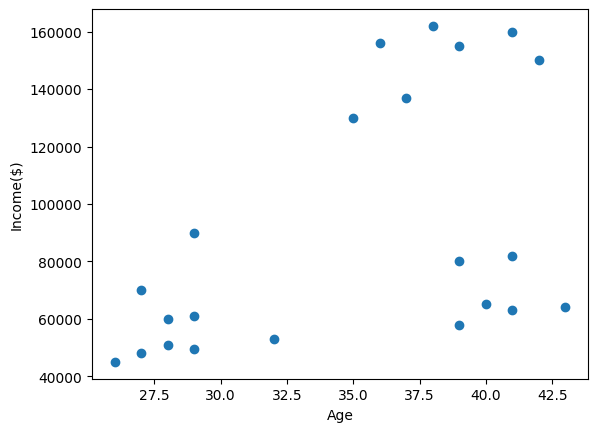

In [ ]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')
# يرسم رسمًا بيانيًا متناثراً (scatter plot) حيث يمثل العمر على المحور السيني والدخل على المحور الصادي.
# المخرجات: رسم بياني متناثر يظهر نقاط البيانات وفقًا للعمر والدخل.

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

# إنشاء نموذج KMeans بعدد 3 مجموعات (n_clusters=3).
# تدريب النموذج باستخدام أعمدة العمر والدخل.
# استخدام fit_predict لتحديد المجموعة لكل نقطة.
# المخرجات: مصفوفة تظهر التصنيفات الناتجة لكل نقطة بيانات

array([2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [5]:
df['cluster']=y_predicted
df.head()

# يضيف عمودًا جديدًا يسمى cluster يحتوي على تصنيفات كل نقطة.
# يعرض أول 5 صفوف من البيانات.
# المخرجات: جدول البيانات مع العمود الجديد cluster.

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [6]:
km.cluster_centers_

# يعرض مراكز المجموعات الثلاث الناتجة.
# المخرجات: مصفوفة تحتوي على إحداثيات مراكز المجموعات الثلاث.

array([[3.63333333e+01, 8.40000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.24166667e+01, 5.72916667e+04]])

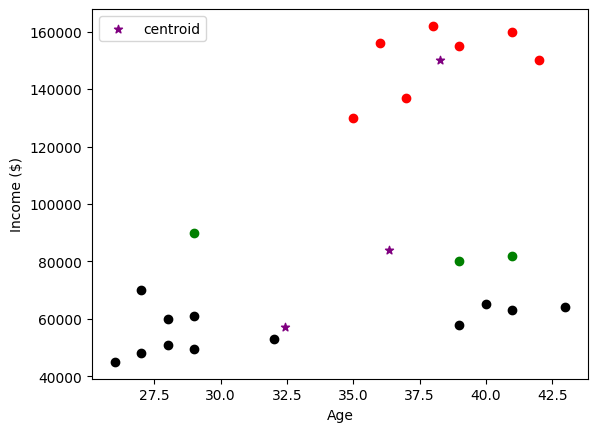

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

# يقسم البيانات إلى 3 مجموعات بناءً على القيم في عمود cluster.
# يرسم النقاط لكل مجموعة بلون مختلف.
# يرسم مراكز المجموعات باستخدام علامة النجمة.
# المخرجات: رسم بياني يظهر النقاط ملونة حسب المجموعات مع مواقع المراكز.

In [8]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

# يستخدم MinMaxScaler لتطبيع بيانات العمر والدخل إلى نطاق بين 0 و1.

In [9]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


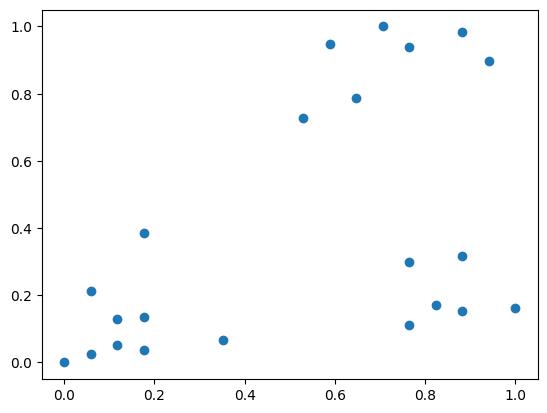

In [ ]:
plt.scatter(df.Age,df['Income($)'])

# يعيد رسم الرسم البياني المتناثر بعد التطبيع.

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

# يعيد إنشاء نموذج KMeans بنفس الطريقة ولكن مع البيانات المطبقة عليها التطبيع.

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [17]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [13]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

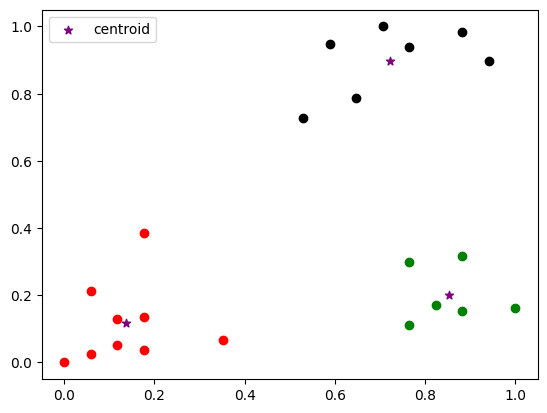

In [14]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [15]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
    
    # يحسب SSE (مجموع الأخطاء المربعة) لعدة قيم لـ k.

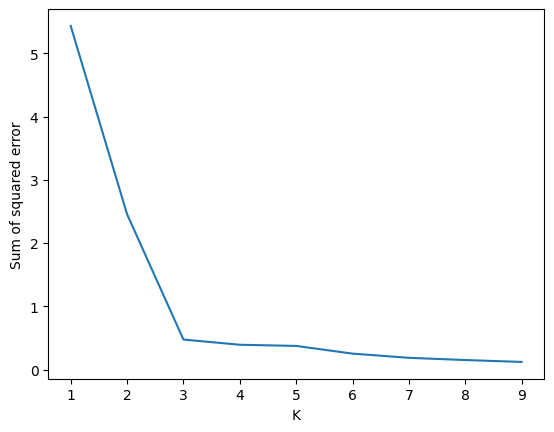

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# يرسم منحنى SSE لاختيار العدد المثالي للمجموعات (من خلال طريقة المرفق "Elbow Method").